In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.api.types import CategoricalDtype

In [2]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('data.full.csv')
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1249,01/01/2014,citrus fruit,2014,1,1,2
1,1249,01/01/2014,coffee,2014,1,1,2
2,1381,01/01/2014,curd,2014,1,1,2
3,1381,01/01/2014,soda,2014,1,1,2
4,1440,01/01/2014,other vegetables,2014,1,1,2


## EDA TASKS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [6]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [7]:
df.describe(include='all')

,Member_number,Date,itemDescription,year,month,day,day_of_week
count,38765.000000,38765,38765,38765.000000,38765.000000,38765.000000,38765.000000
unique,NaN,728,167,NaN,NaN,NaN,NaN
top,NaN,21/01/2015,whole milk,NaN,NaN,NaN,NaN
freq,NaN,96,2502,NaN,NaN,NaN,NaN
mean,3003.641868,NaN,NaN,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,NaN,NaN,0.499193,3.431561,8.801391,1.987669
min,1000.000000,NaN,NaN,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,NaN,NaN,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,NaN,NaN,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,NaN,NaN,2015.000000,9.000000,23.000000,5.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Member_number'] = df['Member_number'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int64         
 4   month            38765 non-null  int64         
 5   day              38765 non-null  int64         
 6   day_of_week      38765 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.1+ MB


In [9]:
str(df['Date'].dt.date.min()) + '  to  ' +str(df['Date'].dt.date.max()) 

'2014-01-01  to  2015-12-30'

In [10]:
df.duplicated(keep='first').sum()

759

In [11]:
df[df.duplicated(keep=False)].sort_values(by='Member_number')

,Member_number,Date,itemDescription,year,month,day,day_of_week
2945,1003,2014-02-27,rolls/buns,2014,2,27,3
2946,1003,2014-02-27,rolls/buns,2014,2,27,3
12356,1005,2014-09-01,rolls/buns,2014,9,1,0
12357,1005,2014-09-01,rolls/buns,2014,9,1,0
27511,1006,2015-06-14,frankfurter,2015,6,14,6
...,...,...,...,...,...,...,...
33805,4981,2015-10-01,margarine,2015,10,1,3
35355,4988,2015-10-29,rolls/buns,2015,10,29,3
35357,4988,2015-10-29,rolls/buns,2015,10,29,3
2825,4992,2014-02-24,margarine,2014,2,24,0


In [12]:
df[df.duplicated(keep=False)].groupby(['Member_number','Date','itemDescription'],as_index=False).agg(DuplicateCount=('itemDescription','count')).sort_values(by='Member_number') 

,Member_number,Date,itemDescription,DuplicateCount
0,1003,2014-02-27,rolls/buns,2
1,1005,2014-09-01,rolls/buns,2
2,1006,2015-06-14,frankfurter,2
3,1008,2015-07-21,yogurt,2
4,1026,2015-05-28,root vegetables,2
...,...,...,...,...
727,4960,2015-08-19,bottled water,2
728,4968,2014-04-03,beef,2
729,4981,2015-10-01,margarine,3
730,4988,2015-10-29,rolls/buns,2


In [13]:
df['Weekdays'],df['Days'],df['Months'],df['Years']= df.Date.dt.strftime('%A'),df.Date.dt.strftime('%d'),df.Date.dt.strftime('%b'),df.Date.dt.strftime('%Y')
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,Weekdays,Days,Months,Years
0,1249,2014-01-01,citrus fruit,2014,1,1,2,Wednesday,01,Jan,2014
1,1249,2014-01-01,coffee,2014,1,1,2,Wednesday,01,Jan,2014
2,1381,2014-01-01,curd,2014,1,1,2,Wednesday,01,Jan,2014
3,1381,2014-01-01,soda,2014,1,1,2,Wednesday,01,Jan,2014
4,1440,2014-01-01,other vegetables,2014,1,1,2,Wednesday,01,Jan,2014


In [14]:
df['itemDescription'].nunique()

167

In [15]:
df['Member_number'].nunique()

3898

In [16]:
Top10Groceries=df.itemDescription.value_counts().sort_values(ascending=False)[0:10]

fig=px.bar(Top10Groceries,color=Top10Groceries.index,
           labels={'value':'Quantity Sold','index':'Grocery Items'})
fig.update_layout(showlegend=False,
                 title_text='Top 10 Groceries Sold',title_x=0.5,
                 title={'font': {'size':20}} )
fig.show()

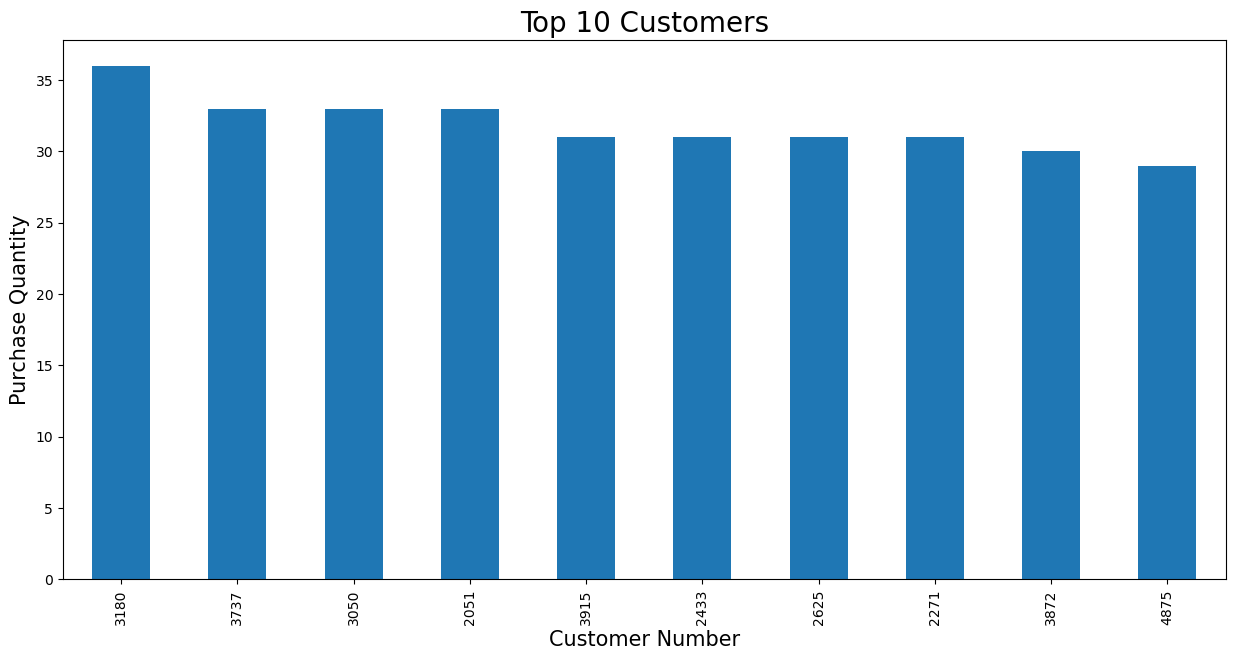

In [17]:
Top10Customers=df.groupby('Member_number').agg(PurchaseQuantity=('itemDescription','count')).sort_values(by='PurchaseQuantity',ascending=False)[0:10]

Top10Customers.plot(kind='bar',figsize=(15,7),legend=None)
plt.title('Top 10 Customers',fontsize=20)
plt.xlabel('Customer Number',fontsize=15)
plt.ylabel('Purchase Quantity',fontsize=15)
plt.show()

In [18]:
df.set_index('Date',inplace=True)

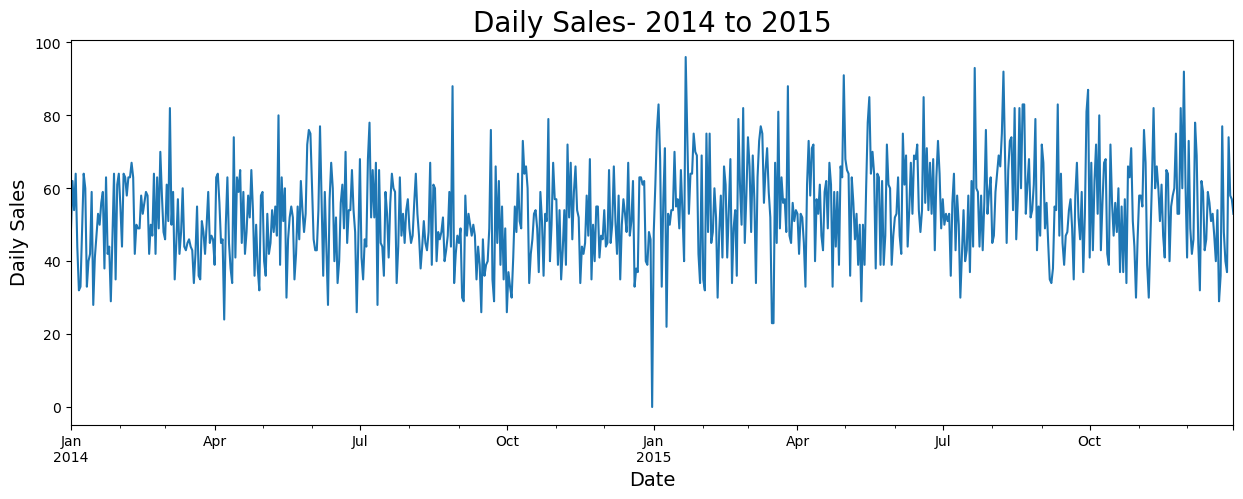

In [19]:
df.resample('D')[['itemDescription']].count().plot(kind='line',figsize=(15,5),legend=None)
plt.title('Daily Sales- 2014 to 2015',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Daily Sales',fontsize=14)
plt.show()

C:\Users\hieup\AppData\Local\Temp\ipykernel_10580\1112762192.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



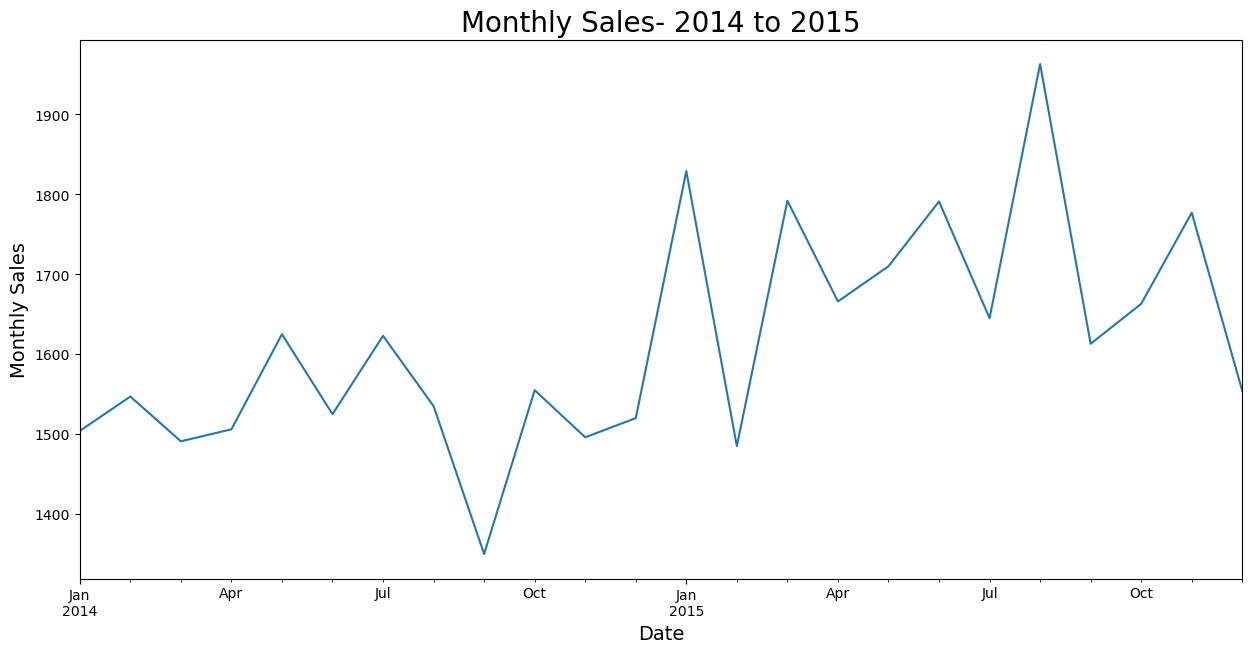

In [20]:
df.resample('M')[['itemDescription']].count().plot(kind='line',figsize=(15,7),legend=None )
plt.title('Monthly Sales- 2014 to 2015',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Monthly Sales',fontsize=14)
plt.show()

In [21]:
temp=df.groupby(['Years','Months'],as_index=False).agg(Sales=('itemDescription','count'))
temp.head()

,Years,Months,Sales
0,2014,Apr,1506
1,2014,Aug,1535
2,2014,Dec,1520
3,2014,Feb,1547
4,2014,Jan,1504


In [22]:
order_months=CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
temp['Months']=temp['Months'].astype(order_months)
temp=temp.sort_values(by='Months')
fig=px.line(temp,x='Months',y='Sales',color='Years')
fig.update_layout(title_text='Monthly Sales- 2014 to 2015',title_x=0.5,
                 title={'font': {'size':20}})

In [23]:
temp2=df.groupby(['Years','Weekdays'],as_index=False).agg(Sales=('itemDescription','count'))

order_days=CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
temp2['Weekdays']=temp2['Weekdays'].astype(order_days)
temp2=temp2.sort_values(by='Weekdays')

fig=px.line(temp2,x='Weekdays',y='Sales',color='Years')
fig.update_layout(title_text='Weekday Sales- 2014 to 2015',title_x=0.5,
                 title={'font': {'size':20}})

In [24]:
temp3=df.groupby(['Years','Days'],as_index=False).agg(Sales=('itemDescription','count'))

fig=px.line(temp3,x='Days',y='Sales',color='Years')
fig.update_layout(title_text='Sales Per Days of the Month',title_x=0.5,
                 title={'font':{'size':20}})
fig.show()

In [25]:
temp4= df.groupby(['Years','Weekdays'],as_index=False).agg(DailyCustomers=('Member_number','nunique'))

order_days=CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
temp4['Weekdays']=temp4['Weekdays'].astype(order_days)
temp4=temp4.sort_values(by='Weekdays')

fig=px.line(temp4,x='Weekdays',y='DailyCustomers',color='Years')
fig.update_layout(title_text='Weekday Customers- 2014 & 2015',title_x=0.5,
                 title={'font': {'size':20}})

In [26]:
df=df.reset_index()

In [27]:
temp5= df.groupby([pd.Grouper(key='Date',freq='D'),'Years','Months','Weekdays'],as_index=False).agg(UniqueCustomers=('Member_number','nunique'))
temp5

,Date,Years,Months,Weekdays,UniqueCustomers
0,2014-01-01,2014,Jan,Wednesday,21
1,2014-01-02,2014,Jan,Thursday,29
2,2014-01-03,2014,Jan,Friday,24
3,2014-01-04,2014,Jan,Saturday,28
4,2014-01-05,2014,Jan,Sunday,20
...,...,...,...,...,...
723,2015-12-26,2015,Dec,Saturday,15
724,2015-12-27,2015,Dec,Sunday,21
725,2015-12-28,2015,Dec,Monday,19
726,2015-12-29,2015,Dec,Tuesday,22


In [28]:
temp6=temp5.groupby(['Years','Weekdays'],as_index=False)[['UniqueCustomers']].mean()

fig=px.bar(temp6,x='Weekdays',y='UniqueCustomers',color='Weekdays',facet_col='Years',
          category_orders={'Weekdays':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']})
fig.update_layout(title_text='Avg Number of Unique Customers Per Weekday',title_x=0.5,
                 title={'font': {'size':20}},
                 showlegend=False)
fig.show()

In [29]:
temp6=df.groupby([pd.Grouper(key='Date',freq='D'),'Years','Weekdays'],as_index=False).agg(Sales=('itemDescription','count'),Customers=('Member_number','nunique'))
temp6

,Date,Years,Weekdays,Sales,Customers
0,2014-01-01,2014,Wednesday,48,21
1,2014-01-02,2014,Thursday,62,29
2,2014-01-03,2014,Friday,54,24
3,2014-01-04,2014,Saturday,64,28
4,2014-01-05,2014,Sunday,44,20
...,...,...,...,...,...
723,2015-12-26,2015,Saturday,37,15
724,2015-12-27,2015,Sunday,74,21
725,2015-12-28,2015,Monday,58,19
726,2015-12-29,2015,Tuesday,57,22


In [30]:
temp7=temp6.groupby(['Years','Weekdays'],as_index=False).agg(Sales=('Sales','sum'),Customers=('Customers','sum')).eval('SalesPerCustomer=Sales/Customers').drop(columns=['Sales','Customers'])

fig=px.bar(temp7,x='Weekdays',y='SalesPerCustomer',color='Weekdays',facet_col='Years',
      category_orders={'Weekdays':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']})

fig.update_layout(title_text='Weekday Sales Per Customer',title_x=0.5,
                 title={'font': {'size':20}},
                 showlegend=False)


fig.show()

## Find baskets

In [31]:
df.head()

,Date,Member_number,itemDescription,year,month,day,day_of_week,Weekdays,Days,Months,Years
0,2014-01-01,1249,citrus fruit,2014,1,1,2,Wednesday,01,Jan,2014
1,2014-01-01,1249,coffee,2014,1,1,2,Wednesday,01,Jan,2014
2,2014-01-01,1381,curd,2014,1,1,2,Wednesday,01,Jan,2014
3,2014-01-01,1381,soda,2014,1,1,2,Wednesday,01,Jan,2014
4,2014-01-01,1440,other vegetables,2014,1,1,2,Wednesday,01,Jan,2014


In [32]:
df_process = df[['Date', 'Member_number', 'itemDescription']]
df_process.head()

,Date,Member_number,itemDescription
0,2014-01-01,1249,citrus fruit
1,2014-01-01,1249,coffee
2,2014-01-01,1381,curd
3,2014-01-01,1381,soda
4,2014-01-01,1440,other vegetables


In [34]:
baskets = (
    df_process.groupby(['Date', 'Member_number'])['itemDescription']
    .agg(lambda x: ','.join(sorted(x)))
    .reset_index()
)
baskets.head()

,Date,Member_number,itemDescription
0,2014-01-01,1249,"citrus fruit,coffee"
1,2014-01-01,1381,"curd,soda"
2,2014-01-01,1440,"other vegetables,yogurt"
3,2014-01-01,1659,"frozen vegetables,specialty chocolate"
4,2014-01-01,1789,"candles,hamburger meat"


In [35]:
baskets['Date'] = pd.to_datetime(baskets['Date']).dt.strftime('%d/%m/%Y')

# Đổi tên cột
baskets.columns = ['Member_number', 'Date', 'Baskets']

baskets.to_csv('baskets.csv', sep=';', index=False)